Building the Fine-tuned Classification Model

In [100]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [101]:
voted_docs_final = pd.read_csv('data/voted_docs_final_193.csv')

display(voted_docs_final.head())

,Unnamed: 0,Vote ID,File,Order of vote,Date,Title,Procedure,Leg/Non-Leg/Bud,Type of Vote,Voting Rule,...,REG%,S&D%,The Left%,General Majority,Right Majority,Left Majority,Consensus,Report link,Summary link,Summary text
0,82,83,10,1,22.10.2019,European Globalisation Adjustment Fund (2014-2...,***I,Leg,Draft legislative resolution,s,...,0.713,0.773,0.707,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to enable the European Globalisation ...
1,84,85,10,1,22.10.2019,Implementation and financing of the EU general...,***,Leg,Draft legislative resolution,s,...,0.833,0.818,0.756,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to mitigate the negative effects of t...
2,85,86,10,1,22.10.2019,Periods of application of Regulation (EU) 2019...,***I,Leg,Draft legislative resolution,s,...,0.852,0.851,0.732,1,0,0,1,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to amend certain provisions relating ...
3,149,150,12,1,24.10.2019,Financial assistance to Member States to cover...,***I,Leg,Draft legislative resolution,s,...,0.778,0.766,0.805,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,PURPOSE: to extend the scope of the European U...
4,293,294,16,1,26.11.2019,EU-Ukraine Agreement Amending the trade prefer...,***,Leg,Draft legislative resolution,s,...,0.944,0.766,0.000,1,0,0,0,https://oeil.secure.europarl.europa.eu/oeil/po...,https://oeil.secure.europarl.europa.eu/oeil/po...,"PURPOSE: to conclude, on behalf of the Union, ..."


Calculate Random Guess Accuracy

In [102]:
# create new dataframe with same index/ Vote IDs
random_guess = pd.DataFrame(index=voted_docs_final["Vote ID"])

# add random guesses between 0 and 1 rounded to two decimals for each group
random_guess['ECR%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['EPP%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['Greens/EFA%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['IDG%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['NI%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['REG%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['S&D%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
random_guess['The Left%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]

print(random_guess.shape)
display(random_guess.head())


(193, 8)


,ECR%,EPP%,Greens/EFA%,IDG%,NI%,REG%,S&D%,The Left%
Vote ID,,,,,,,,
83,0.64,0.17,0.91,0.04,0.34,0.30,0.64,0.49
85,0.63,0.79,0.22,0.82,0.12,0.70,0.13,0.15
86,0.20,0.12,0.48,0.95,0.97,0.08,0.51,0.84
150,0.40,0.05,0.30,0.58,0.09,0.62,0.81,0.55
294,0.98,0.94,0.59,0.29,0.43,0.18,0.19,0.09


In [103]:
# set Vote ID as index
voted_docs_final.set_index('Vote ID', inplace=True)

In [104]:
# function to calculate accuracy
def accuracy_df (original_df, test_df, tolerance_interval):
    """"
    Function to calculate the accuracy of a test dataframe compared to an original dataframe.
    Takes as arguments the original dataframe and the test dataframe and a tolerance interval.
    For each index in the original data frame, it finds the corresponding index in the test data frame
    and checks if the values in the test data frame are within the tolerance interval of the original 
    data frame.
    Calculates accuracy as the number of correct guesses divided by the number of guesses.
    Returns the accuracy.
    """
    # create a new dataframe with the same index as the original dataframe
    accuracy_df = pd.DataFrame(index=original_df.index)
    # add a column for each column in the original dataframe
    for column in original_df.iloc[:, 32:40]:
        accuracy_df[column] = 0
    # loop through the rows of the original dataframe
    for index in original_df.index:
        # loop through the columns of the original dataframe
        for column in original_df.iloc[:, 32:40]:
            # check if the value in the test dataframe is within the tolerance interval of the original dataframe
            if (original_df.loc[index, column] - tolerance_interval) <= test_df.loc[index, column] <= (original_df.loc[index, column] + tolerance_interval):
                # if it is, add 1 to the corresponding cell in the accuracy dataframe
                accuracy_df.loc[index, column] = 1
    # calculate the accuracy as the sum of the accuracy dataframe divided by the number of cells
    accuracy = accuracy_df.sum().sum() / (accuracy_df.shape[0] * accuracy_df.shape[1])
    return round(accuracy, 4), accuracy_df

Accuracy of random guesses: 0.0997
         ECR%  EPP%  Greens/EFA%  IDG%  NI%  REG%  S&D%  The Left%
Vote ID                                                           
83          0     0            0     0    1     0     0          0
85          0     0            0     0    0     0     0          0
86          0     0            0     0    0     0     1          0
150         0     0            0     0    0     0     0          0
294         0     1            0     0    0     0     0          0


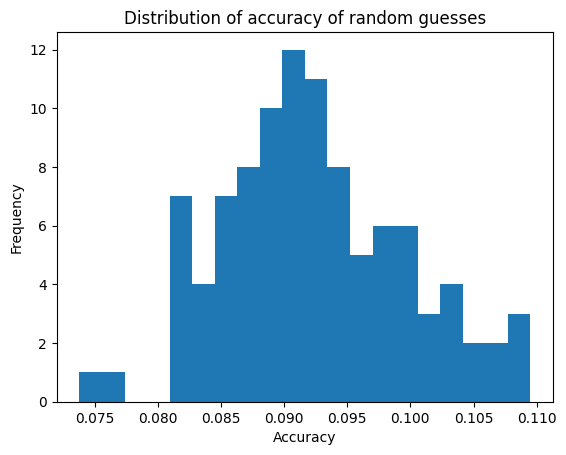

Mean accuracy of random guesses: 0.09


In [107]:
# calculate accuracy of random guesses
accuracy_random = accuracy_df(voted_docs_final, random_guess, 0.05)
print(f"Accuracy of one random guess: {accuracy_random[0]}")
print(accuracy_random[1].head())

# repeat the process for 100 random guesses
accuracy_random_list = []

for i in range(100):
    random_guess = pd.DataFrame(index=voted_docs_final.index)
    random_guess['ECR%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['EPP%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['Greens/EFA%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['IDG%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['NI%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['REG%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['S&D%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    random_guess['The Left%'] = [round(random.random(), 2) for _ in range(len(voted_docs_final))]
    accuracy_random = accuracy_df(voted_docs_final, random_guess, 0.05)
    accuracy_random_list.append(accuracy_random[0])

# plot the distribution of accuracy of random guesses
plt.hist(accuracy_random_list, bins=20)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of accuracy of random guesses')
plt.show()

# calculate the mean accuracy of random guesses
mean_accuracy_random = np.mean(accuracy_random_list)
print(f"Mean accuracy of random guesses: {round(mean_accuracy_random, 4)}")

In [ ]:
# create a copy of voted_docs_final
training = voted_docs_final.copy()

# only keep columns and Vote ID
training = training[['Vote ID', 'Summary text']]
print(training.shape)

# drop rows with NA in Summary text
training = training[training['Summary text'] != "NA"]

# set seed
np.random.seed(1)  

# sample 10 rows
training_sample10 = training.sample(10)
print(training_sample10)

# save training to csv
training_sample10.to_csv('data/training10.csv')

# sample 50 rows
training_sample50 = training.sample(50)
print(training_sample50.head())

# save training to csv
training_sample50.to_csv('data/training50.csv')


In [ ]:
# Calculate accuracy of ChatGPT3.5 predictions

In [ ]:
# Calculate accuracy of ChatGPT4 predictions